<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/7_3_String_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


## String Object Methods

.split()

.strip()

In [2]:
#类似pd.read_csv()里面的'sep='， 这里可以用任何符号当作分隔符
# .split()
val = 'a,b, guido'
val.split(',')

['a', 'b', ' guido']

In [4]:
#split is always combined with strip(),把空白给去除掉
words = [x.strip() for x in val.split(',')]
words

['a', 'b', 'guido']

经常碰到想要用某些字符，把几个变量连接起来，我会a+'xx'+b+'xx'+c之类的

但实际上我只需要用 .join()

In [5]:
#命名三个变量
first, second, third = words

#蠢的方法
first + '::' + second + '::' + third

'a::b::guido'

In [6]:
#聪明的方法, Pythonic way
'::'.join(words)

'a::b::guido'

.index() 找value对应的index

.find() 同理，但是这个找不到不会报错

In [7]:
'guido' in val

True

In [8]:
val.index(',')

1

In [9]:
val.find(':') # -1代表找不到

-1

In [10]:
val.index(':') #如果用index去找，找不到会报错

ValueError: ignored

.count() 算出现次数

In [11]:
val.count(',')

2

.replace() 把某些值替换掉

In [12]:
val.replace(',', '::') #syntax是('被取代值'， '替换值')

'a::b:: guido'

In [13]:
val.replace(',', '') #经常弄个空的''，常见

'ab guido'

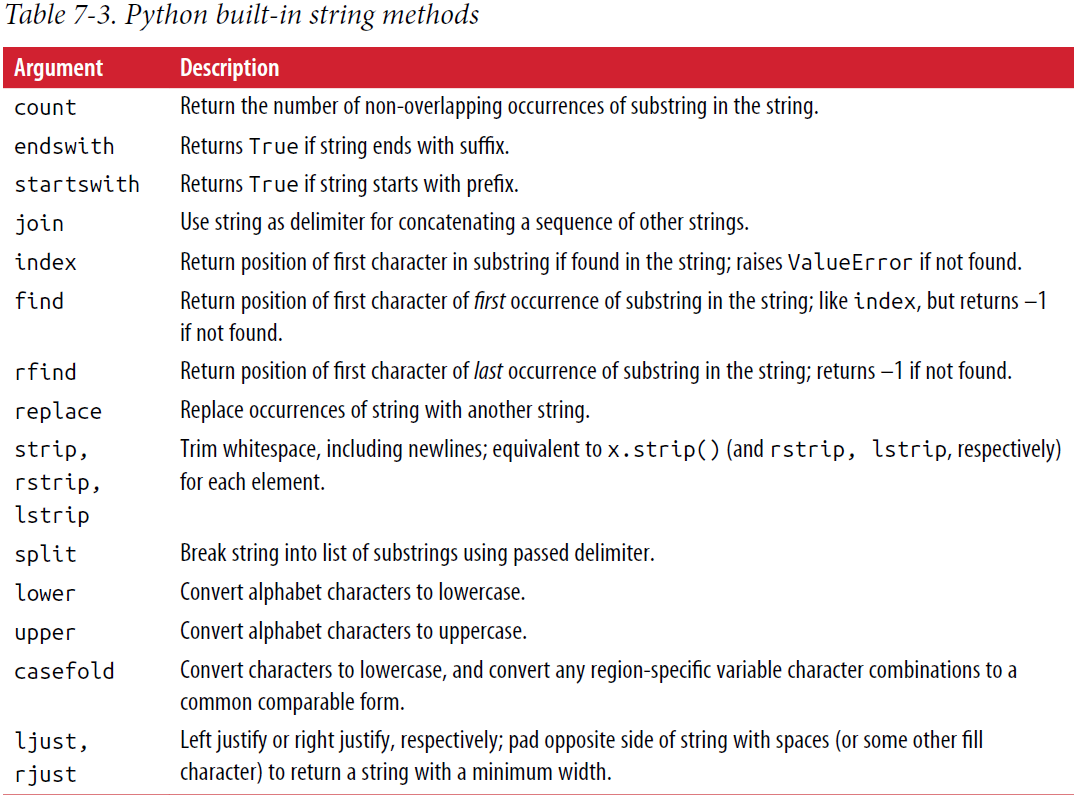

## Regular Expression
❓

The art of writing regular expressions could be a chapter of its own and thus is outside the book’s scope. There are many excellent tutorials and references available on the internet and in other books.

Python的 re 模块分成三大类：pattern matching, substitution, and splitting

In [15]:
import re #Python原生的模块
text = "foo bar\t baz \tqux"
text

'foo bar\t baz \tqux'

In [16]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

解释一下这个场景背后运作

re.split()之前，首先会compiled，然后split再对这个text进行操作

你可以手动compile，如下：

In [17]:
regex = re.compile('\s+')
regex

re.compile(r'\s+', re.UNICODE)

In [18]:
regex.split(text) #实现同样效果

['foo', 'bar', 'baz', 'qux']

为何同样的效果，后者更推荐呢？

Creating a regex object with re.compile is **highly recommended** if you intend to apply the same expression to many strings; doing so will save CPU cycles.

因为在处理大批量的数据的时候，这个方法更省内存，更快

In [19]:
# findall()找到这个text里面符合该规则的地方
regex.findall(text)

[' ', '\t ', ' \t']

接下来这个例子实在是不懂

我直觉是和formatting有关的

In [20]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [21]:
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [22]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

接下来的有难度，看不懂，建议我自己再看看regular expression

## Vectorized String Functions in pandas
❓

In [23]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
     'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [24]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [25]:
data.str.contains('gmail') #.str.contains()这个贼厉害，能查value是否有这个string

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [27]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
pattern

'[A-Z0-9._%+-]+@[A-Z0-9.-]+\\.[A-Z]{2,4}'

In [28]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [dave@google.com]
Steve    [steve@gmail.com]
Rob        [rob@gmail.com]
Wes                    NaN
dtype: object

In [36]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0] #有问题，理想是把一个地址分成 dave google com
matches

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [39]:
matches.str.get(1)#有问题，理想是得出google, gmail, gmail

Dave       d
Steve      s
Rob        r
Wes      NaN
dtype: object